In [166]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [66]:
ggphdv3 = pd.read_table('./139977.170112.2326.GGPHDV3.frqx')

In [60]:
ggphdv3.shape

(6222, 10)

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
0,1,51032,A,B,7,206,2108,0,0,2
1,1,6496,A,B,314,1121,878,0,0,10
2,1,47961,B,A,235,1036,1038,0,0,14
3,1,22465,A,B,213,1009,1098,0,0,3
4,1,55218,B,A,71,661,1590,0,0,1


In [67]:
ggphdv3[ggphdv3['C(HET)']<1].head()

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
35,1,49468,B,0,2321,0,0,0,0,2
1912,7,58099,A,0,2272,0,0,0,0,51
2420,8,17351,B,0,2320,0,0,0,0,3
4702,19,17640,B,0,2323,0,0,0,0,0
5112,22,56964,B,0,2321,0,0,0,0,2


In [16]:
freqs = glob.glob('*.frqx')
freqs

['139977.170112.2326.GGPHDV3.frqx',
 '227234.170112.325.GGPF250.frqx',
 '26504.170112.3126.GGPLDV3.frqx',
 '30105.170112.2500.GGPLDV4.frqx',
 '58336.170112.315.SNP50A.frqx',
 '58336.170112.335.SNP50B.frqx',
 '58336.170112.3399.SNP50C.frqx',
 '76999.170112.3498.GGP90KT.frqx',
 '777962.170127.483.HD.frqx']

In [102]:
allcounts = {}
for i in freqs:
    df = pd.read_table(i)
    df=df[df.CHR <30]
    df=df.iloc[:,:8]
    allcounts[i.split('.')[3]]= df

In [20]:
allfreqs[1]

'227234.170112.325.GGPF250.frqx'

In [103]:
for k,i in allcounts.items():
    print(k)
    print(i[i['C(HET)']<1])

GGPF250
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  B  0        325       0          0          0
3443   13  14125  B  0        325       0          0          0
4501   18  46491  B  0        325       0          0          0
4702   19  17640  B  0        325       0          0          0
GGPHDV3
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35      1  49468  B  0       2321       0          0          0
1912    7  58099  A  0       2272       0          0          0
2420    8  17351  B  0       2320       0          0          0
4702   19  17640  B  0       2323       0          0          0
5112   22  56964  B  0       2321       0          0          0
SNP50A
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
545     2  26434  B  0        308       0          0          0
2420    8  17351  B  0        307       0          0          0
3443   13  14125  B  0        308       0          0          0
4702   19  17640 

In [104]:
def singlesite(site):
    site1 = site + 1
    for k,i in allcounts.items():
        print(k)
        print(i.iloc[site:site1,:8])

In [106]:
singlesite(3400)

GGPF250
      CHR   SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
3400   12  9806  B  A         33     153        138          0
GGPHDV3
      CHR   SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
3400   12  9806  B  A        209    1006       1104          0
SNP50A
      CHR   SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
3400   12  9806  B  A         16     102        186          0
SNP50B
      CHR   SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
3400   12  9806  B  A         43     161        130          0
SNP50C
      CHR   SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
3400   12  9806  B  A        302    1465       1504          0
GGPLDV3
      CHR   SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
3400   12  9806  B  A        302    1236       1548          0
GGPLDV4
      CHR   SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
3400   12  9806  A  B        486    1282        722          0
GGP90KT
      CHR   SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HA

GGPLDV4 has sites that are only fixed within it, and sites that are heterozygous in it, but fixed everywhere else

In [62]:
for k,i in allfreqs.items():
    print(k)
    print(i.iloc[1912:1913,:8])


GGPF250
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1912    7  58099  A  B         31     126        168          0
GGPHDV3
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1912    7  58099  A  0       2272       0          0          0
SNP50A
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1912    7  58099  A  B         45     151        112          0
SNP50B
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1912    7  58099  A  B         21     120        193          0
SNP50C
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1912    7  58099  A  B        350    1404       1526          0
GGPLDV3
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1912    7  58099  A  B        319    1289       1475          0
GGPLDV4
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1912    7  58099  B  A        557    1233        697          0
GGP90KT
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  

In [55]:
for k,i in allfreqs.items():
    print(k)
    print(i.iloc[35:36,:8])

GGPF250
    CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35    1  49468  B  A         54     168         96          0
GGPHDV3
    CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35    1  49468  B  0       2321       0          0          0
SNP50A
    CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35    1  49468  B  A         69     135        103          0
SNP50B
    CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35    1  49468  B  A         59     164        111          0
SNP50C
    CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35    1  49468  B  A        639    1615       1023          0
GGPLDV3
    CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35    1  49468  B  A        624    1520        943          0
GGPLDV4
    CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35    1  49468  A  B          0       7       2479          0
GGP90KT
    CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
35    1  

In [54]:
for k,i in allfreqs.items():
    print(k)
    print(i.iloc[4581:4582,:8])


GGPF250
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4581   19  11379  B  A         34     153        138          0
GGPHDV3
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4581   19  11379  B  A        453    1169        700          0
SNP50A
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4581   19  11379  B  A         80     141         86          0
SNP50B
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4581   19  11379  B  A         35     134        165          0
SNP50C
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4581   19  11379  B  A        562    1626       1091          0
GGPLDV3
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4581   19  11379  B  A        508    1510       1070          0
GGPLDV4
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4581   19  11379  A  0       2492       0          0          0
GGP90KT
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  

In [32]:
for i in allfreqs:
    print(i.iloc[2420:2421,:8])


      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  B  0       2320       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  B  0        325       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  B  0       3097       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  B  A        317    1183        989          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  B  0        307       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  B  0        333       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  A  B          0       2       3277          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
2420    8  17351  A  B          0       

In [38]:
! grep 17351 ../merged_strand/170112_merged.frqx 

8	17351	B	A	13497	1186	989	0	0	78


In [33]:
for i in allfreqs:
    print(i.iloc[4702:4703,:8])
4702

      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4702   19  17640  B  0       2323       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4702   19  17640  B  0        325       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4702   19  17640  A  B          0       0       3055          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4702   19  17640  B  A        432    1290        768          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4702   19  17640  B  0        308       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4702   19  17640  B  0        334       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4702   19  17640  B  0       3280       0          0          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
4702   19  17640  B  0       3491       

4702

In [35]:
freqs[3]

'30105.170112.2500.GGPLDV4.frqx'

In [36]:
for i in allfreqs:
    print(i.iloc[1296:1297,:8])
4702
1296

      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1296    5  41333  A  B        568    1135        607          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1296    5  41333  A  B         83     155         85          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1296    5  41333  B  A        778    1431        785          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1296    5  41333  0  A          0       0       2490          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1296    5  41333  A  B         73     155         75          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1296    5  41333  A  B         77     160         92          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1296    5  41333  B  A        776    1639        849          0
      CHR    SNP A1 A2  C(HOM A1)  C(HET)  C(HOM A2)  C(HAP A1)
1296    5  41333  A  B        830    163

1296

In [92]:
ggphdv3.head()

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
0,1,51032,A,B,7,206,2108,0,0,2
1,1,6496,A,B,314,1121,878,0,0,10
2,1,47961,B,A,235,1036,1038,0,0,14
3,1,22465,A,B,213,1009,1098,0,0,3
4,1,55218,B,A,71,661,1590,0,0,1


In [89]:
 220 + 2*2108 + 206

4642

In [94]:
220.0/4642

0.04739336492890995

In [87]:
samp['51032']

0.04739336492890995

In [84]:
testf = open('./139977.170112.2326.GGPHDV3.frqx')
testf.readline()
samp = {}
for line in testf:
    chr,snp,a1,a2,ha1,het,ha2,ch,c2,mis = line.split()
    ha1,het,ha2 = int(ha1),int(het),int(ha2)
    if (a1,a2)==('A','B'):
        bcount = 2 *ha2 + het
        acount = 2 *ha1 + het
    if (a1,a2)==('B','A'):
        acount = 2 *ha2 + het
        bcount = 2 *ha1 + het
    if (a1,a2)==('A','0'):
        acount = 2 *ha1 + het
        bcount = 0
    if (a1,a2)==('B','0'):
        bcount = 2 *ha1 + het
        acount = 0
    fullcount = acount + bcount
    afreq = float(acount)/fullcount
    bfreq = float(bcount)/fullcount
    samp[snp] = (afreq)

In [98]:
allfreqs = {}
for i in freqs:
    print(i)
    file = open(i)
    file.readline()
    samp = {}
    for line in file:
        chr,snp,a1,a2,ha1,het,ha2,ch,c2,mis = line.split()
        ha1,het,ha2 = int(ha1),int(het),int(ha2)
        if (a1,a2)==('A','B'):
            bcount = 2 *ha2 + het
            acount = 2 *ha1 + het
        if (a1,a2)==('B','A'):
            acount = 2 *ha2 + het
            bcount = 2 *ha1 + het
        if (a1,a2)==('A','0'):
            acount = 2 *ha1 + het
            bcount = 0
        if (a1,a2)==('B','0'):
            bcount = 2 *ha1 + het
            acount = 0
        fullcount = acount + bcount
        if fullcount == 0:
            print(line)
            break
        afreq = float(acount)/fullcount
        bfreq = float(bcount)/fullcount
        samp[snp] = (afreq)
    allfreqs[i.split('.')[3]] = samp


139977.170112.2326.GGPHDV3.frqx
227234.170112.325.GGPF250.frqx
30	38753	B	A	0	0	0	75	248	2

26504.170112.3126.GGPLDV3.frqx
30105.170112.2500.GGPLDV4.frqx
58336.170112.315.SNP50A.frqx
30	38753	B	A	0	0	0	90	210	8

58336.170112.335.SNP50B.frqx
30	38753	B	A	0	0	0	70	264	0

58336.170112.3399.SNP50C.frqx
76999.170112.3498.GGP90KT.frqx
777962.170127.483.HD.frqx


In [100]:
freq_frame = pd.DataFrame(allfreqs)

In [101]:
freq_frame.corr()

,GGP90KT,GGPF250,GGPHDV3,GGPLDV3,GGPLDV4,HD,SNP50A,SNP50B,SNP50C
GGP90KT,1.000000,0.892541,0.643732,0.981374,0.014558,0.975908,0.957606,0.888741,0.990686
GGPF250,0.892541,1.000000,0.583069,0.935066,0.007294,0.906057,0.783690,0.982407,0.932353
GGPHDV3,0.643732,0.583069,1.000000,0.632556,0.076414,0.628986,0.612118,0.581244,0.639727
GGPLDV3,0.981374,0.935066,0.632556,1.000000,0.010229,0.962828,0.911558,0.925647,0.985679
GGPLDV4,0.014558,0.007294,0.076414,0.010229,1.000000,0.008675,0.012997,0.012570,0.013082
HD,0.975908,0.906057,0.628986,0.962828,0.008675,1.000000,0.959012,0.895991,0.981513
SNP50A,0.957606,0.783690,0.612118,0.911558,0.012997,0.959012,1.000000,0.782354,0.944318
SNP50B,0.888741,0.982407,0.581244,0.925647,0.012570,0.895991,0.782354,1.000000,0.928470
SNP50C,0.990686,0.932353,0.639727,0.985679,0.013082,0.981513,0.944318,0.928470,1.000000


In [120]:
freq_frame.corr().describe()

,GGP90KT,GGPF250,GGPHDV3,GGPLDV3,GGPLDV4,HD,SNP50A,SNP50B,SNP50C
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.816127,0.780275,0.599761,0.816104,0.128424,0.813219,0.773739,0.777491,0.823981
std,0.320250,0.316435,0.234606,0.322064,0.327557,0.322106,0.310733,0.313509,0.323726
min,0.014558,0.007294,0.076414,0.010229,0.007294,0.008675,0.012997,0.012570,0.013082
25%,0.888741,0.783690,0.583069,0.911558,0.010229,0.895991,0.782354,0.782354,0.928470
50%,0.957606,0.906057,0.628986,0.935066,0.012997,0.959012,0.911558,0.895991,0.944318
75%,0.981374,0.935066,0.639727,0.981374,0.014558,0.975908,0.957606,0.928470,0.985679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
freq_frame.head()

,GGP90KT,GGPF250,GGPHDV3,GGPLDV3,GGPLDV4,HD,SNP50A,SNP50B,SNP50C
10004,0.383888,0.273994,0.388889,0.360239,0.354242,0.323158,0.441558,0.263473,0.377673
10005,0.370121,0.358462,0.373273,0.311931,0.397071,0.383966,0.396104,0.333832,0.380435
10021,0.325788,0.304615,0.301903,0.353381,0.186798,0.334737,0.386364,0.250000,0.313453
10037,0.721931,0.643963,0.744952,0.714431,0.403900,0.675906,0.744186,0.673653,0.705892
10038,0.433024,0.478395,0.435401,0.424174,0.712505,0.417895,0.368506,0.537425,0.440854


In [205]:
freq_diffs  =pd.DataFrame(abs(freq_frame.GGPLDV3 - freq_frame.SNP50C),columns=['GGPLDV3_VS_SNP50c'])
freq_diffs['GGP90KT_VS_SNP50c'] = abs(freq_frame.GGP90KT - freq_frame.SNP50C)
freq_diffs['GGPLDV4_VS_SNP50c'] = abs(freq_frame.GGPLDV4 - freq_frame.SNP50C)
freq_diffs['GGPLDV3_VS_GGP90'] = abs(freq_frame.GGPLDV3 - freq_frame.GGP90KT)
freq_diffs['GGPHDV3_VS_SNP50c'] = abs(freq_frame.GGPHDV3 - freq_frame.SNP50C)

freq_diffs.describe()

,GGPLDV3_VS_SNP50c,GGP90KT_VS_SNP50c,GGPLDV4_VS_SNP50c,GGPLDV3_VS_GGP90,GGPHDV3_VS_SNP50c
count,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000
mean,0.026253,0.020925,0.233039,0.029677,0.089571
std,0.020207,0.016869,0.172184,0.023477,0.151953
min,0.000000,0.000000,0.000059,0.000000,0.000000
25%,0.010366,0.007958,0.092738,0.011208,0.010634
50%,0.021886,0.017519,0.198893,0.024893,0.024899
75%,0.038112,0.030319,0.340217,0.042931,0.061795
max,0.124106,0.445241,0.984948,0.444901,0.983135


In [123]:
freq_diffs.head()

,LDV3_VS_SNP50c,GGP90KT_VS_SNP50c,GGPLDV4_VS_SNP50c,GGPLDV3_VS_GGP90,GGPHDV3_VS_SNP50c
10004,0.017433,0.006215,0.023431,0.023648,0.011216
10005,0.068504,0.010314,0.016636,0.058189,0.007162
10021,0.039928,0.012335,0.126656,0.027593,0.011550
10037,0.008538,0.016039,0.301992,0.007500,0.039060
10038,0.016680,0.007830,0.271652,0.008850,0.005453


In [ ]:
sns.stripplot(x="day", y="total_bill", data=freq_diffs)

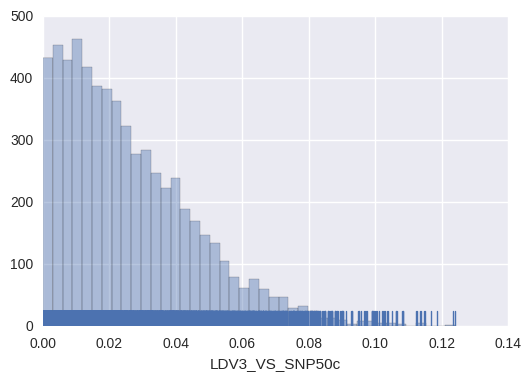

In [130]:
sns.distplot(freq_diffs.LDV3_VS_SNP50c, kde=False, rug=True);

In [145]:
freq_diffs.head(2)

,LDV3_VS_SNP50c,GGP90KT_VS_SNP50c,GGPLDV4_VS_SNP50c,GGPLDV3_VS_GGP90,GGPHDV3_VS_SNP50c
10004,0.017433,0.006215,0.023431,0.023648,0.011216
10005,0.068504,0.010314,0.016636,0.058189,0.007162


In [163]:
np.arange(0,1,.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

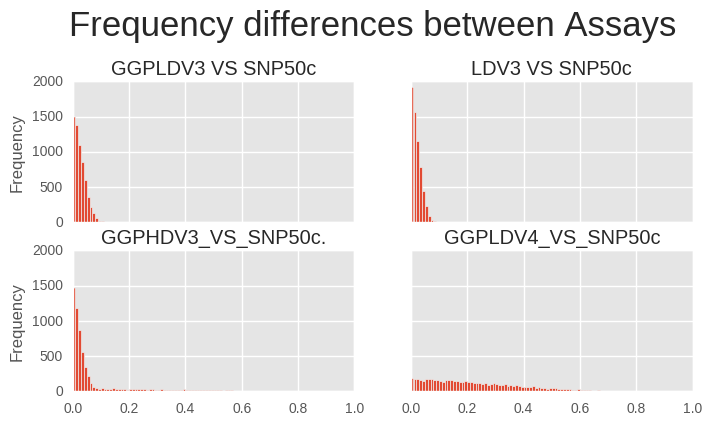

In [206]:
binner = np.arange(0,1,.01)
fig, axes = plt.subplots(nrows=2,ncols=2,sharey=True,figsize=(8,4),sharex=True)
freq_diffs.GGPLDV3_VS_SNP50c.plot(kind='hist',xlim=(0,1),bins=binner,ax=axes[0,0]).set_title('GGPLDV3 VS SNP50c')
freq_diffs.GGP90KT_VS_SNP50c.plot(kind='hist',xlim=(0,1),bins=binner,ax=axes[0,1]).set_title('LDV3 VS SNP50c')
freq_diffs.GGPLDV4_VS_SNP50c.plot(kind='hist',xlim=(0,1),bins=binner,ax=axes[1,1]).set_title('GGPLDV4_VS_SNP50c')
freq_diffs.GGPHDV3_VS_SNP50c.plot(kind='hist',xlim=(0,1),bins=binner,ax=axes[1,0]).set_title('GGPHDV3_VS_SNP50c.')

plt.suptitle('Frequency differences between Assays',fontsize=25,y=1.08)


In [79]:
testf = open('./139977.170112.2326.GGPHDV3.frqx')
testf.readline()
frank = []
for line in testf:
    chr,snp,a1,a2,ha1,het,ha2,ch,c2,mis = line.split()
    ha1,het,ha2 = int(ha1),int(het),int(ha2)
    frank.append((a1,a2))

In [199]:
freq_diffs.head().min(axis=1)

10004    0.006215
10005    0.007162
10021    0.011550
10037    0.007500
10038    0.005453
dtype: float64

In [233]:
freq_diffs[freq_diffs.max(axis=1) > .15].describe()

,GGPLDV3_VS_SNP50c,GGP90KT_VS_SNP50c,GGPLDV4_VS_SNP50c,GGPLDV3_VS_GGP90,GGPHDV3_VS_SNP50c
count,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000
mean,0.025595,0.020446,0.313437,0.029068,0.119907
std,0.019898,0.017126,0.155345,0.023562,0.177426
min,0.000000,0.000000,0.000240,0.000000,0.000000
25%,0.009859,0.007635,0.198872,0.010832,0.011240
50%,0.021185,0.016924,0.288025,0.024045,0.027878
75%,0.037415,0.029761,0.407326,0.041920,0.183012
max,0.118764,0.445241,0.984948,0.444901,0.983135


In [234]:
freq_diffs[freq_diffs.GGPHDV3_VS_SNP50c > .15].describe()

,GGPLDV3_VS_SNP50c,GGP90KT_VS_SNP50c,GGPLDV4_VS_SNP50c,GGPLDV3_VS_GGP90,GGPHDV3_VS_SNP50c
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,0.026762,0.020914,0.255014,0.030224,0.369853
std,0.020784,0.016384,0.170223,0.023419,0.162600
min,0.000016,0.000015,0.000240,0.000039,0.150699
25%,0.010461,0.007741,0.127290,0.011322,0.237679
50%,0.021886,0.017247,0.223774,0.025394,0.334351
75%,0.039698,0.030516,0.361000,0.043307,0.465030
max,0.116937,0.084119,0.984948,0.136656,0.983135


In [213]:
GGPHDV3_bads=freq_diffs[freq_diffs.GGPHDV3_VS_SNP50c > .15].index.tolist()

In [238]:
GGPLDV4_bads = freq_diffs[freq_diffs.GGPLDV4_VS_SNP50c > .15].index.tolist()

In [243]:
print(len(GGPHDV3_bads))

1141


In [244]:
outhd =  open('GGPHDV3_diff_GT_15.txt','w')
for i in GGPHDV3_bads:
    outhd.write(i + '\n')
outhd.close()
! head GGPHDV3_diff_GT_15.txt

43304
43305
43334
43337
43351
43382
43406
43424
43427
43440


In [240]:
print(len(GGPLDV4_bads))
outld =  open('GGPLDV4_diff_GT_15.txt','w')
for i in GGPLDV4_bads:
    outld.write(i + '\n')
outld.close()

3799


In [223]:
len([i for i in GGPHDV3_bads if i not in GGPLDV4_bads])

349

In [230]:
len([i for i in GGPLDV4_bads if i  not in GGPHDV3_bads])

3007

In [229]:
len([i for i in GGPLDV4_bads if i   in GGPHDV3_bads])

792

792

In [247]:
ld4bads = freq_frame[freq_diffs.GGPLDV4_VS_SNP50c > .15]

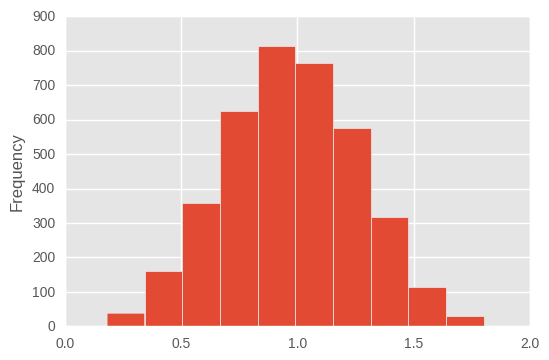

In [251]:
(ld4bads.GGPLDV4 + ld4bads.SNP50C)

In [275]:
flips=ld4bads[((ld4bads.GGPLDV4>.5) & (ld4bads.SNP50C <.5)) |((ld4bads.GGPLDV4<.5) & (ld4bads.SNP50C >.5)) ]
flips[(flips.GGPLDV4 + flips.SNP50C)<.8]

,GGP90KT,GGPF250,GGPHDV3,GGPLDV3,GGPLDV4,HD,SNP50A,SNP50B,SNP50C
10250,0.555380,0.597222,0.535345,0.607687,0.081994,0.595789,0.524351,0.595808,0.553691
10262,0.529665,0.555385,0.526509,0.561872,0.048193,0.535865,0.485390,0.559880,0.516311
10403,0.207485,0.153846,0.203488,0.184296,0.522280,0.212632,0.253247,0.151198,0.205218
10586,0.108240,0.170769,0.114987,0.113409,0.547026,0.106316,0.087662,0.211078,0.120958
10592,0.540448,0.484568,0.543799,0.491168,0.104661,0.496842,0.498377,0.476048,0.528532
106,0.631451,0.615385,0.621845,0.574781,0.119229,0.620000,0.657980,0.682635,0.651372
10603,0.272297,0.338462,0.282852,0.291086,0.515273,0.284211,0.256494,0.315868,0.279700
1064,0.466848,0.663580,0.457309,0.545558,0.116359,0.535789,0.400974,0.629129,0.535998
10790,0.540614,0.465944,0.527359,0.524248,0.087716,0.569474,0.527597,0.434132,0.524878
10932,0.573517,0.430769,0.593966,0.549255,0.039558,0.541053,0.615635,0.459581,0.565091


In [265]:
ld4bads[((ld4bads.GGPLDV4>.5) & (ld4bads.SNP50C >.5)) |((ld4bads.GGPLDV4<.5) & (ld4bads.SNP50C <.5)) ].describe()

,GGP90KT,GGPF250,GGPHDV3,GGPLDV3,GGPLDV4,HD,SNP50A,SNP50B,SNP50C
count,1170.000000,1160.000000,1170.000000,1170.000000,1170.000000,1170.000000,1160.000000,1160.000000,1170.000000
mean,0.479110,0.482682,0.474240,0.480658,0.454105,0.478907,0.476240,0.484075,0.479623
std,0.219778,0.214535,0.239227,0.220232,0.280959,0.213614,0.229110,0.218766,0.215597
min,0.002875,0.003077,0.000000,0.002784,0.000000,0.000000,0.000000,0.002994,0.001374
25%,0.329414,0.334243,0.313025,0.321527,0.202629,0.336053,0.316558,0.335329,0.332530
50%,0.472816,0.473765,0.469596,0.470839,0.467068,0.473629,0.469968,0.476048,0.472994
75%,0.610418,0.623746,0.627625,0.608077,0.701415,0.604970,0.629870,0.630337,0.601065
max,0.998137,0.996904,0.999568,0.999514,1.000000,1.000000,1.000000,0.998503,0.997256


In [266]:
ld4bads.shape

(3799, 9)

In [283]:
flang = freq_frame.index.tolist()

In [285]:
flang.sort()

In [291]:
snpids = [int(i) for i in flang]

In [292]:
snpids.sort()

In [297]:
ff = open('flipped_snp.txt','rr')
flippers = []
for i in ff:
    flippers.append(i.strip())

In [302]:
len([i for i in flippers if int(i) in snpids])

542